100%|██████████| 6/6 [00:00<00:00, 5999.00it/s]


0          mp-864685    mp-2460   mp-11256  mp-974638    mp-5177  mp-567600
0                                                                          
mp-864685   0.000000  80.850108  61.707459  50.937709  59.233045  49.635758
mp-2460    80.850108   0.000000  27.264559  34.276468  24.940192  34.108979
mp-11256   61.707459  27.264559   0.000000  15.996521   9.512514  15.460082
mp-974638  50.937709  34.276468  15.996521   0.000000  10.688893  11.310740
mp-5177    59.233045  24.940192   9.512514  10.688893   0.000000  10.084767
mp-567600  49.635758  34.108979  15.460082  11.310740  10.084767   0.000000


100%|██████████| 2000/2000 [00:00<00:00, 58811.30it/s]

BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.01  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


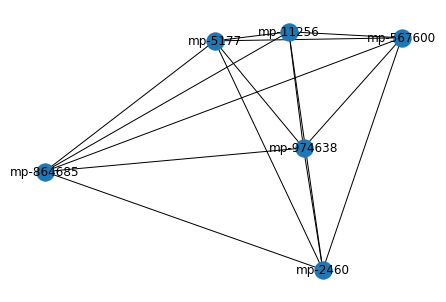

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange
import networkx as nx
from fa2 import ForceAtlas2

materials = pd.read_csv("../Data/model_output_all_kpoint_total_dos_epoch_401_432_batches.csv", header=None, index_col=0).T
materials_normalised = materials.apply(lambda col: col/col.sum())

cumul_materials = materials_normalised.apply(lambda col: col.cumsum())

sample_materials_normalised = materials_normalised.sample(n=6, axis='columns', random_state=6)

sample_cumul_materials = sample_materials_normalised.apply(lambda col: col.cumsum())

sample_cols = sample_cumul_materials.columns
sample_idx = sample_cols.copy()
sample_cumul_mat = sample_cumul_materials.to_numpy(dtype=float, na_value=np.nan, copy=False)

sample_diff_mat = np.empty((sample_cumul_mat.shape[1], sample_cumul_mat.shape[1]))
sample_diff_mat.fill(0)

for i in trange(sample_diff_mat.shape[0]):
    for j in range(i+1, sample_diff_mat.shape[1]):
        sample_diff_mat[i][j] = sum(abs(sample_cumul_mat[:,i] - sample_cumul_mat[:,j]))


sample_adj_mat = sample_diff_mat + sample_diff_mat.T
sample_adj_df = pd.DataFrame(sample_adj_mat, index=sample_idx, columns=sample_cols)
print(sample_adj_df)

forceatlas2 = ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution=True,  # Dissuade hubs
    linLogMode=False,  # NOT IMPLEMENTED
    adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
    edgeWeightInfluence=1.0,

    # Performance
    jitterTolerance=1.0,  # Tolerance
    barnesHutOptimize=True,
    barnesHutTheta=1.2,
    multiThreaded=False,  # NOT IMPLEMENTED

    # Tuning
    scalingRatio=2.0,
    strongGravityMode=False,
    gravity=1.0,

    # Log
    verbose=True
)
sample_positions = forceatlas2.forceatlas2(sample_adj_df.to_numpy(), pos=None, iterations=2000)
sample_node_positions = {sample_adj_df.columns.values[i]: sample_positions[i] for i in range(len(sample_adj_df))}
sample_G = nx.from_pandas_adjacency(sample_adj_df)

nx.draw(sample_G, sample_node_positions, with_labels=True)
plt.axis('off')
plt.show()

100%|██████████| 2000/2000 [00:00<00:00, 60592.94it/s]

BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.00  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


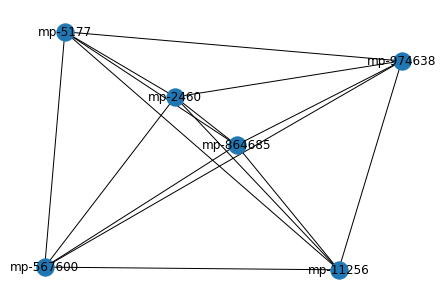

In [40]:
sample_positions = forceatlas2.forceatlas2(sample_adj_df.to_numpy(), pos=None, iterations=2000)
sample_node_positions = {sample_adj_df.columns.values[i]: sample_positions[i] for i in range(len(sample_adj_df))}
sample_G = nx.from_pandas_adjacency(sample_adj_df)

nx.draw(sample_G, sample_node_positions, with_labels=True)
plt.axis('off')
plt.show()